# Защита персональных данных клиентов

<a id=0></a>
[Содержание](#0)

[1. Описание проекта](#1)

[2. Подготовка данных](#2)

[3. Умножение матриц](#3)

[4. Алгоритм преобразования](#4)

[5. Проверка алгоритма](#5)

[6. Общий вывод](#6)

<a id=1></a>
## 1. Описание проекта

Нужно защитить данные клиентов страховой компании «Хоть потоп». 

**Цель проекта:**

Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Данные**

Набор данных находится в файле: `/datasets/insurance.csv`

- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

**План работы**

1. Изучить данные.

2. Подготовить и обосновать ответ на вопрос: при умножении признаков на обратимую матрицу, изменится ли качество линейной регрессии?

3. Предложить алгоритм преобразования данных для решения задачи.

4. Запрограммировать этот алгоритм, применив матричные операции.

5. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования, применив метрику R2.

6. Сделать выводы, оформить проект.

<a id=2></a>
[Содержание](#0)
## 2. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

RND_STATE = 10022023

In [2]:
try:
    ins_df = pd.read_csv('/datasets/insurance.csv')
except:
    ins_df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


**Вывод:**

В данных отсутствуют пропуски.

In [3]:
ins_df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посмотрим уникальные значения данных в столбцах:

In [4]:
def show_unic(df):
    for column in df.columns:
        print('\n Уникальные значения столбца:', column)
        print(df[column].unique())

show_unic(ins_df)


 Уникальные значения столбца: Пол
[1 0]

 Уникальные значения столбца: Возраст
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]

 Уникальные значения столбца: Зарплата
[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 330

Изменим тип данных в столбцах `Возраст` и `Зарплата` на целочисленный ввиду отсутствия дробных частей.

Так же оптимизируем размер остальных столбцов.

In [5]:
for column in ins_df.columns:
    ins_df[column] = pd.to_numeric(ins_df[column], downcast = 'integer')

ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int8   
 1   Возраст            5000 non-null   int8   
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int8   
 4   Страховые выплаты  5000 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 58.7 KB


Посмотрим граничные значения по столбцам:

In [6]:
ins_df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Посмотрим гистограммах распределение переменных в датасете:

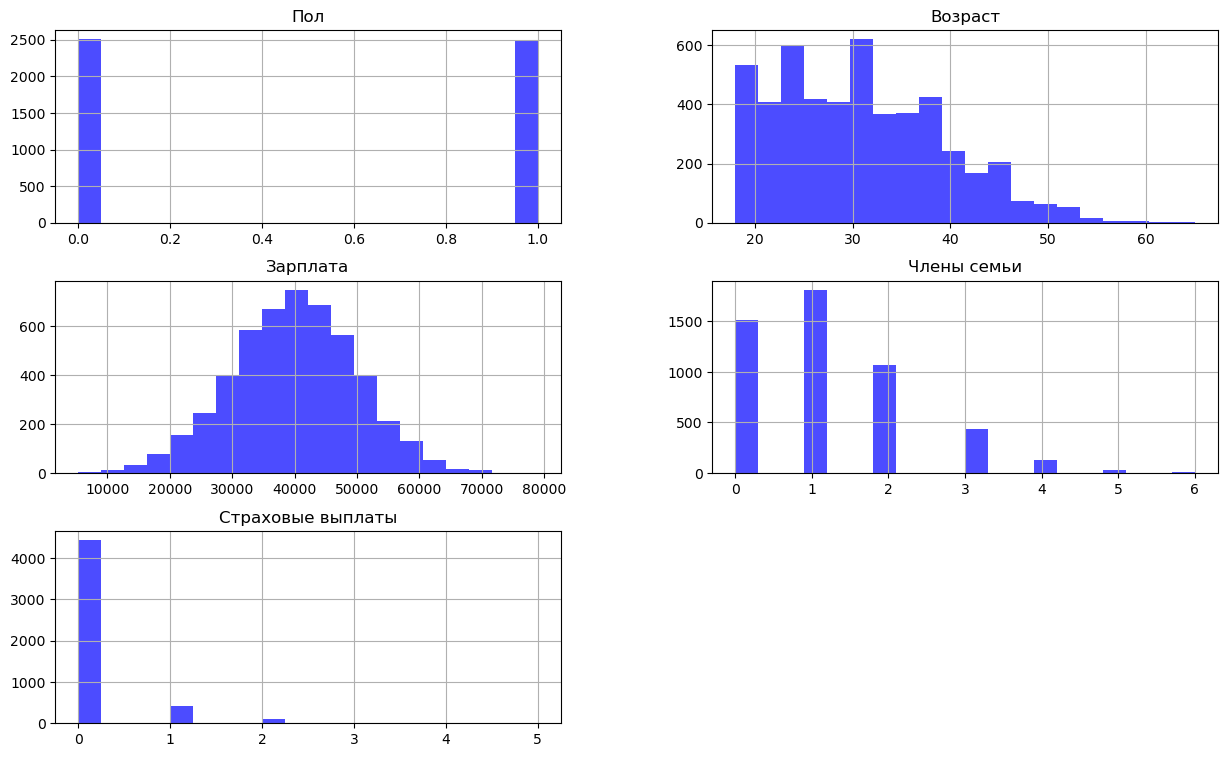

In [7]:
ins_df.hist(figsize = (15, 9), bins = 20, alpha = 0.7, color = 'blue')
plt.show()

Посмотрим коэффициенты корреляции Пирсона для переменных датасета:

In [8]:
ins_df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Корреляция показывает, что данные в столбце `Возраст` положительно корелируют со `Страховыми выплатами`.

Посмотрим мультиколлинеарность:

**Вывод:**

При подготовке данных отметил:
- Пропусков в данных нет
- Аномалий в данных не обнаружено
- Существует положительная корреляция между признаками `Возраст` и `Страховые выплаты`

Данные загружены, подготовлены для дальнейшей работы, размер оптимизирован.

<a id=3></a>
[Содержание](#0)
## 3. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Основные свойства матриц:**

($A(BC) = (AB)C$) - свойство ассоциативности (сочетательности) матриц<br>

$(P^T)^{-1} = (P^{-1})^T$ - транспортированная обратная матрица есть обратная матрица транспортированная <br>

$(AB)^T = B^T A^T$ - транспонированное произведение матриц равно произведению транспонированных матриц <br>

$(AB)^{-1} = B^{-1} A^{-1}$ - обратная матрица от произведения двух матриц равна обратной матрицы $B$ (второй) к обратной матрице $А$ (первой)<br>

$P P^{-1} = E$ - умножение матрицы на свою обратную - есть единичная матрица<br>

$(ABC)^{-1} =C^{-1} B^{-1} A^{-1}$ - умножение матриц ассоциативно<br>

($AB != BA$) - умножение матриц некоммутативно, от перестановки местами матриц в произведении результат меняется
 

**Предсказания:**

$$
a = Xw
$$

**Задача обучения:**

$$
w = \arg\min_w MSE(Xw, y)
$$

**Формула обучения:**

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново)

**Ответ:**

 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Обоснование:**

Умножим матрицу признаков $X$ в формуле обучения

$$
w = (X^T X)^{-1} X^T y
$$

на обратимую матрицу $P$:

$$
w(XP) = [(XP)^T (XP)]^{-1} (XP)^T y = [P^T X^T XP]^{-1} P^T X^T y = 
$$

$$
= P^{-1}[P^T (X^T X)]^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} [(P^T)^{-1} P^T] X^T y =
$$

заменив $[(P^T)^{-1} P^T]=E$ получим

$$
= P^{-1}(X^T X)^{-1} X^T y
$$

Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной:

$$
w(XP) = P^{-1} w(X)
$$

Подставим $w(XP)$ в формулу предсказания $a = Xw(X)$ (т.е. заменим $X$ на $XP$):

$$
a = XP w(XP) = XP [P^{-1} w(X)] = Xw(X)
$$

**Вывод:**

При умножении матрицы признаков $X$ на обратимую матрицу $P$ вектор весов $w$ меняется, а вектор целевого признака $a$ нет, т.е. качество линейной регрессии не изменится.


<a id=4></a>
[Содержание](#0)
## 4. Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать
матрицу признаков на обратимую матрицу $P$, которая будет генерироваться случайным образом.

Этапы алгоритма:

- Составление матрицы $P$.
- Проверка матрицы на обратимость. Вычисление детерминанта матрицы $P$.
- Получение матрицы преобразованных признаков $Z = XP$.
- Применение алгоритма на преобразованных признаках $Z$.


**Обоснование**

Матрица  $P$  должна иметь необходимую размерность  (nxn), где n - количество признаков для регрессии.

Таким образом матрица  $Z$  будет иметь туже размерность, что и матрица  $X$.

Обратная матрица  $P$  существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

Пример:

$X =
\left(
\begin{array}{cc}
1 & 2 \\ 
2 & 3 \\
4 & 5 \\
\end{array}
\right)$

$P = 
\left(
\begin{array}{cc}
1 & 0 \\
2 & 3 \\
\end{array}
\right)$

$det P = 3$

Найдем значние $Z$:

$Z =
\left(
\begin{array}{cc}
1 & 2 \\ 
2 & 3 \\
4 & 5 \\
\end{array}
\right) 
\left(
\begin{array}{cc}
1 & 0 \\
2 & 3 \\
\end{array}
\right)
=
\left(
\begin{array}{cc}
1*1+2*2 & 1*0+2*3 \\
2*1+3*2 & 2*0+3*3 \\
4*1+5*2 & 4*0+5*3 \\
\end{array}
\right)
=
\left(
\begin{array}{cc}
5 & 6 \\ 
8 & 9 \\
14 & 15 \\
\end{array}
\right) 
$

После этого вводим данные в линейную регрессию.


<a id=5></a>
[Содержание](#0)
## 5. Проверка алгоритма

Проведем исследование модели по двум направлениям:
1. Исследуем качество модели без преобразования.
2. Исследуем качество модели с преобразованием.

Разделим данные на обучающие и тестовые:

In [9]:
x = ins_df.drop('Страховые выплаты', axis = 1)
y = ins_df['Страховые выплаты']
x.shape, y.shape

((5000, 4), (5000,))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
                 x, y, test_size = 0.25, random_state = RND_STATE)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)
R2_origin_data = r2_score(y_test, model.predict(x_test))
print("w-vector coef (original)", model.coef_)
print("R2 (original) =", R2_origin_data)

w-vector coef (original) [ 7.67626575e-03  3.55225293e-02  3.24707187e-07 -1.71248290e-02]
R2 (original) = 0.40840605314590306


Создадим функцию преобразования матрицы признаков:

In [12]:
def crypt_df(df):
    
    n = df.shape[1]
    det = 0

    while det == 0:
        np.random.seed(RND_STATE)
        crypto_matrix = np.random.randint(1, 10, (n, n))
        det = np.linalg.det(crypto_matrix)

    crypted_df = df @ crypto_matrix

    return crypted_df, crypto_matrix

Посмотрим на данные до и после преобразования:

In [13]:
crypted_x, crypto_matrix = crypt_df(x)

display(x.head())
display(crypted_x.head())
display(crypto_matrix)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


,0,1,2,3
0,198694.0,446570.0,149018.0,248257.0
1,152324.0,342185.0,114238.0,190280.0
2,84203.0,189116.0,63145.0,105174.0
3,166951.0,375386.0,125221.0,208634.0
4,104601.0,235017.0,78445.0,130675.0


array([[5, 5, 5, 7],
       [7, 4, 5, 6],
       [4, 9, 3, 5],
       [2, 1, 8, 4]])

Видно, что данные потеряли свои оригинальные значения, теперь вместо них мы видим ничего не говорящие числа.

Разобьем преобразованные данные на тренировочную и обучающую выборку и проверим R2 значение:

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
                 crypted_x, y, test_size = 0.25, random_state = RND_STATE)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)
R2_crypted_data = r2_score(y_test, model.predict(x_test))
print('w-vector coef  (crypted)', model.coef_)
print('R2  (crypted) =', R2_crypted_data)
print('')
print('Сравним с показателями оргинальных данных:')
print('w-vector coef (original)', model.coef_)
print('R2 (original) =', R2_origin_data)

w-vector coef  (crypted) [ 0.01124779 -0.00222551 -0.00311177 -0.00312518]
R2  (crypted) = 0.4084060531460093

Сравним с показателями оргинальных данных:
w-vector coef (original) [ 0.01124779 -0.00222551 -0.00311177 -0.00312518]
R2 (original) = 0.40840605314590306


<a id=6></a>
[Содержание](#0)
## 6. Общий вывод

В ходе работы было выполнено:

1. Загружены и изучены данные.
2. Провенено предположение, что качество линейной регресии не изменилось от использования исходной матрицы
и исходной матрицы, умноженной на обратимую.
3. Создан алгоритм преобразования данных.
4. Исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.

По результатам работы использования матричных операций можно увидеть, что данные можно зашифровать от распознования (обезличить), имея правильную матрицу.